In [1]:
import pandas as pd
data = pd.read_csv('loan_data.csv')
data.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [2]:
# Check for any nulls -> No nulls
data.isnull().values.any()

False

In [3]:
# Feature Transformation
# 'purpose' needs to be transformed
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [4]:
# get a count of possible values in 'purpose'
data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [5]:
# First transform string object to categorical
data['purpose'] = data['purpose'].astype('category')
data.dtypes

credit.policy           int64
purpose              category
int.rate              float64
installment           float64
log.annual.inc        float64
dti                   float64
fico                    int64
days.with.cr.line     float64
revol.bal               int64
revol.util            float64
inq.last.6mths          int64
delinq.2yrs             int64
pub.rec                 int64
not.fully.paid          int64
dtype: object

In [6]:
# use cat.codes to transform categorical to discrete numeric variable (int8)
data[['purpose']] = data[['purpose']].apply(lambda x: x.cat.codes)
data.dtypes

credit.policy          int64
purpose                 int8
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [7]:
data['purpose'].value_counts()

2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: purpose, dtype: int64

In [8]:
# Categorical to Numerical Codes Mapping (based on same value counts)

# all_other             0
# credit_card           1
# debt_consolidation    2
# educational           3
# home_improvement      4
# major_purchase        5
# small_business        6

In [9]:
# EDA of Different Factors
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Credit Policy Met Density Plot')

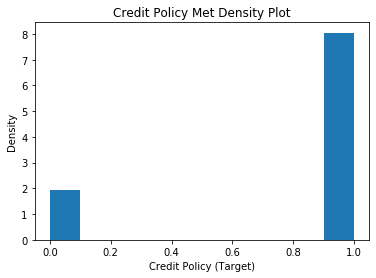

In [10]:
plt.hist(data['credit.policy'], density=True)
plt.ylabel('Density')
plt.xlabel('Credit Policy (Target)')
plt.title('Credit Policy Met Density Plot')

Text(0.5, 1.0, 'Purpose Density Plot')

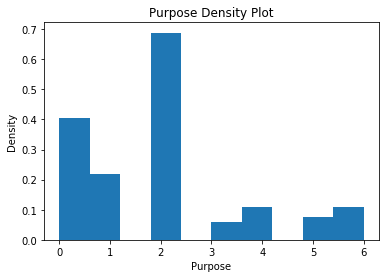

In [11]:
plt.hist(data['purpose'], density=True)
plt.ylabel('Density')
plt.xlabel('Purpose')
plt.title('Purpose Density Plot')

Text(0.5, 1.0, 'Interest Rate Density Plot')

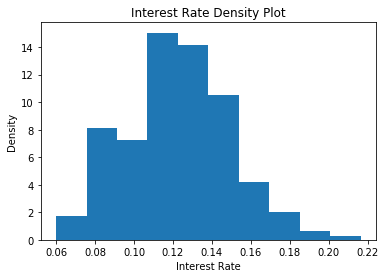

In [12]:
plt.hist(data['int.rate'], density=True)
plt.ylabel('Density')
plt.xlabel('Interest Rate')
plt.title('Interest Rate Density Plot')

Text(0.5, 1.0, 'Self-Reported Annual Income Density Plot')

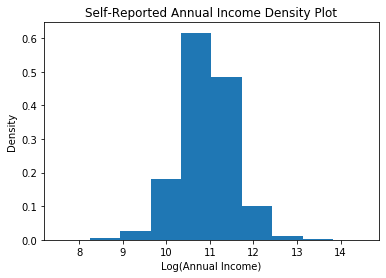

In [13]:
plt.hist(data['log.annual.inc'], density=True)
plt.ylabel('Density')
plt.xlabel('Log(Annual Income)')
plt.title('Self-Reported Annual Income Density Plot')

Text(0.5, 1.0, 'Debt-to-Income Ratio Density Plot')

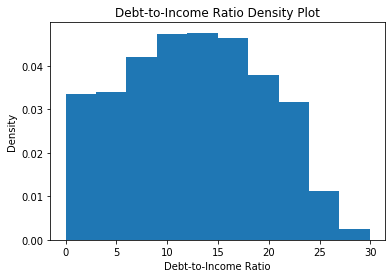

In [14]:
plt.hist(data['dti'], density=True)
plt.ylabel('Density')
plt.xlabel('Debt-to-Income Ratio')
plt.title('Debt-to-Income Ratio Density Plot')

Text(0.5, 1.0, 'Fico Credit Score Density Plot')

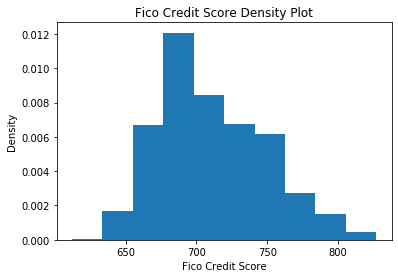

In [15]:
plt.hist(data['fico'], density=True)
plt.ylabel('Density')
plt.xlabel('Fico Credit Score')
plt.title('Fico Credit Score Density Plot')

Text(0.5, 1.0, 'Days with Credit Line Density Plot')

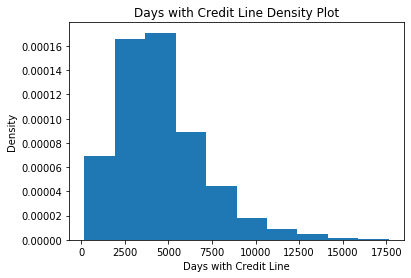

In [16]:
plt.hist(data['days.with.cr.line'], density=True)
plt.ylabel('Density')
plt.xlabel('Days with Credit Line')
plt.title('Days with Credit Line Density Plot')

Text(0.5, 1.0, 'Revolving Balance Density Plot')

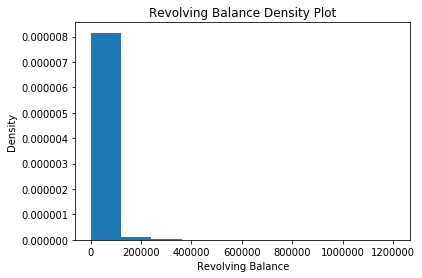

In [17]:
plt.hist(data['revol.bal'], density=True)
plt.ylabel('Density')
plt.xlabel('Revolving Balance')
plt.title('Revolving Balance Density Plot')

Text(0.5, 1.0, 'Revolving Line Utilization Rate Density Plot')

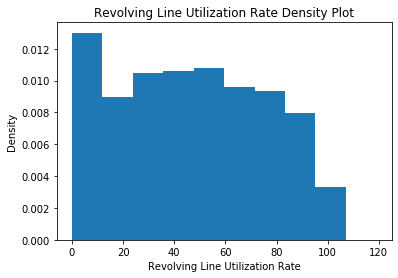

In [18]:
plt.hist(data['revol.util'], density=True)
plt.ylabel('Density')
plt.xlabel('Revolving Line Utilization Rate')
plt.title('Revolving Line Utilization Rate Density Plot')

Text(0.5, 1.0, 'Number of Inquires Density Plot')

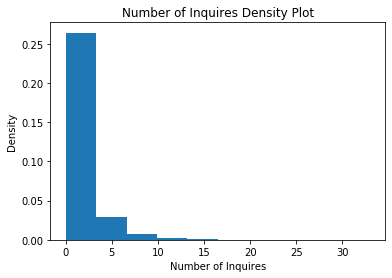

In [19]:
plt.hist(data['inq.last.6mths'], density=True)
plt.ylabel('Density')
plt.xlabel('Number of Inquires')
plt.title('Number of Inquires Density Plot')

Text(0.5, 1.0, '30+ days past due in last 2 years Density Plot')

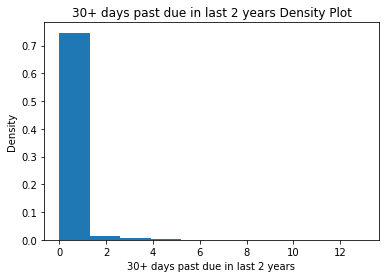

In [20]:
plt.hist(data['delinq.2yrs'], density=True)
plt.ylabel('Density')
plt.xlabel('30+ days past due in last 2 years')
plt.title('30+ days past due in last 2 years Density Plot')

Text(0.5, 1.0, 'Derogatory Public Records Density Plot')

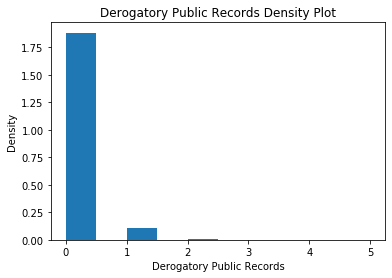

In [21]:
plt.hist(data['pub.rec'], density=True)
plt.ylabel('Density')
plt.xlabel('Derogatory Public Records')
plt.title('Derogatory Public Records Density Plot')

Text(0.5, 1.0, 'Not Fully Paid Density Plot')

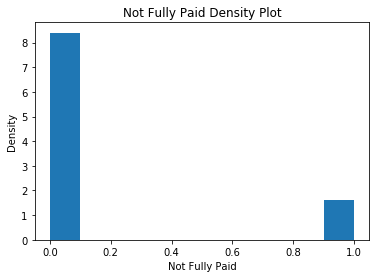

In [22]:
plt.hist(data['not.fully.paid'], density=True)
plt.ylabel('Density')
plt.xlabel('Not Fully Paid')
plt.title('Not Fully Paid Density Plot')

In [23]:
data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [24]:
data['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [25]:
# Observation: The fully paid bills (not.fully.paid=0) have similar number as those who were able to get loans (credit.policy=1)
#              Makes logicial sense and probably the most basic deterministic factor when determing if to grant a loan
#              However, they are still not exactly the same which signifies there are other factors at work

In [26]:
data.mean() # mean of each column

credit.policy            0.804970
purpose                  1.944038
int.rate                 0.122640
installment            319.089413
log.annual.inc          10.932117
dti                     12.606679
fico                   710.846314
days.with.cr.line     4560.767197
revol.bal            16913.963876
revol.util              46.799236
inq.last.6mths           1.577469
delinq.2yrs              0.163708
pub.rec                  0.062122
not.fully.paid           0.160054
dtype: float64

In [27]:
data.std() # std of each column

credit.policy            0.396245
purpose                  1.686881
int.rate                 0.026847
installment            207.071301
log.annual.inc           0.614813
dti                      6.883970
fico                    37.970537
days.with.cr.line     2496.930377
revol.bal            33756.189557
revol.util              29.014417
inq.last.6mths           2.200245
delinq.2yrs              0.546215
pub.rec                  0.262126
not.fully.paid           0.366676
dtype: float64

In [28]:
data_corr = data.corr()
data_corr

credit.policy   purpose  int.rate  installment  \
credit.policy           1.000000  0.017569 -0.294089     0.058770   
purpose                 0.017569  1.000000  0.117067     0.154827   
int.rate               -0.294089  0.117067  1.000000     0.276140   
installment             0.058770  0.154827  0.276140     1.000000   
log.annual.inc          0.034906  0.088958  0.056383     0.448102   
dti                    -0.090901 -0.053279  0.220006     0.050202   
fico                    0.348319  0.057337 -0.714821     0.086039   
days.with.cr.line       0.099026  0.047526 -0.124022     0.183297   
revol.bal              -0.187518  0.042364  0.092527     0.233625   
revol.util             -0.104095 -0.062947  0.464837     0.081356   
inq.last.6mths         -0.535511  0.037516  0.202780    -0.010419   
delinq.2yrs            -0.076318 -0.011701  0.156079    -0.004368   
pub.rec                -0.054243  0.004793  0.098162    -0.032760   
not.fully.paid         -0.158119  0.047907  0.159552     0.049955   

                   log.annual.inc       dti      fico  days.with.cr.line  \
credit.policy            0.034906 -0.090901  0.348319           0.099026   
purpose                  0.088958 -0.053279  0.057337           0.047526   
int.rate                 0.056383  0.220006 -0.714821          -0.124022   
installment              0.448102  0.050202  0.086039           0.183297   
log.annual.inc           1.000000 -0.054065  0.114576           0.336896   
dti                     -0.054065  1.000000 -0.241191           0.060101   
fico                     0.114576 -0.241191  1.000000           0.263880   
days.with.cr.line        0.336896  0.060101  0.263880           1.000000   
revol.bal                0.372140  0.188748 -0.015553           0.229344   
revol.util               0.054881  0.337109 -0.541289          -0.024239   
inq.last.6mths           0.029171  0.029189 -0.185293          -0.041736   
delinq.2yrs              0.029203 -0.021792 -0.216340           0.081374   
pub.rec                  0.016506  0.006209 -0.147592           0.071826   
not.fully.paid          -0.033439  0.037362 -0.149666          -0.029237   

                   revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
credit.policy      -0.187518   -0.104095       -0.535511    -0.076318   
purpose             0.042364   -0.062947        0.037516    -0.011701   
int.rate            0.092527    0.464837        0.202780     0.156079   
installment         0.233625    0.081356       -0.010419    -0.004368   
log.annual.inc      0.372140    0.054881        0.029171     0.029203   
dti                 0.188748    0.337109        0.029189    -0.021792   
fico               -0.015553   -0.541289       -0.185293    -0.216340   
days.with.cr.line   0.229344   -0.024239       -0.041736     0.081374   
revol.bal           1.000000    0.203779        0.022394    -0.033243   
revol.util          0.203779    1.000000       -0.013880    -0.042740   
inq.last.6mths      0.022394   -0.013880        1.000000     0.021245   
delinq.2yrs        -0.033243   -0.042740        0.021245     1.000000   
pub.rec            -0.031010    0.066717        0.072673     0.009184   
not.fully.paid      0.053699    0.082088        0.149452     0.008881   

                    pub.rec  not.fully.paid  
credit.policy     -0.054243       -0.158119  
purpose            0.004793        0.047907  
int.rate           0.098162        0.159552  
installment       -0.032760        0.049955  
log.annual.inc     0.016506       -0.033439  
dti                0.006209        0.037362  
fico              -0.147592       -0.149666  
days.with.cr.line  0.071826       -0.029237  
revol.bal         -0.031010        0.053699  
revol.util         0.066717        0.082088  
inq.last.6mths     0.072673        0.149452  
delinq.2yrs        0.009184        0.008881  
pub.rec            1.000000        0.048634  
not.fully.paid     0.048634        1.000000

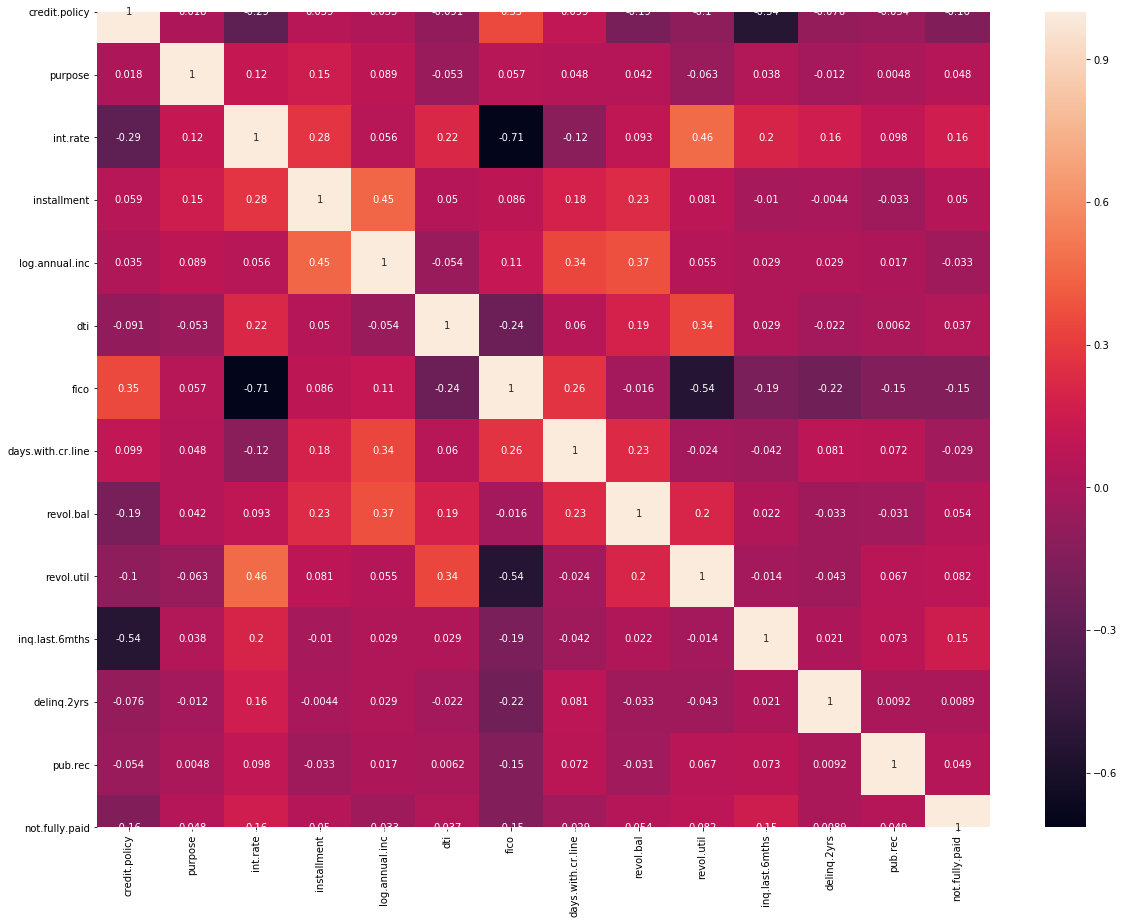

In [67]:
# Additional Feature Engineering
import seaborn as sns
plt.subplots(figsize=(20,15))
sns.heatmap(data_corr, annot=True)

In [13]:
# Procedure to Reduce Features
# Step 1: Look at correlation matrix and determine pairs of features with strong correlation (>= +/- 0.5)
# Step 2: Out of all features: int.rate, fico, revol.util share strong correlations
# corr(int.rate, fico) = -0.71       corr(fico, revol.util) = -0.54
data = data.drop(['int.rate', 'fico', 'revol.util'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 11 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null int8
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(4), int64(6), int8(1)
memory usage: 757.8 KB


In [14]:
# Modeling
features = list(data.columns.values)
features.remove('credit.policy')
X = data[features]
y = data['credit.policy']

In [15]:
X.head()

purpose  installment  log.annual.inc    dti  days.with.cr.line  revol.bal  \
0        2       829.10       11.350407  19.48        5639.958333      28854   
1        1       228.22       11.082143  14.29        2760.000000      33623   
2        2       366.86       10.373491  11.63        4710.000000       3511   
3        2       162.34       11.350407   8.10        2699.958333      33667   
4        1       102.92       11.299732  14.97        4066.000000       4740   

   inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0               0            0        0               0  
1               0            0        0               0  
2               1            0        0               0  
3               1            0        0               0  
4               0            1        0               0

In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: credit.policy, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0) # 70% train, 30% test

In [18]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (10,)), # flatten input first of size 10 (10 features)
    keras.layers.Dense(16, activation = tf.nn.relu),
    keras.layers.Dense(16, activation = tf.nn.relu),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation = tf.nn.sigmoid), # sigmoid squash between 0 and 1 (binary classification)
])

In [19]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy', # for binary classification, give a probability
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 50, batch_size = 50) # trained for 50 epochs with batch_size=50

train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Train Accuracy: ', train_acc)
print('Test Accuracy: ', test_acc)

Train on 6704 samples, validate on 2874 samples
Epoch 1/50
6704/6704 [==============================] - 1s 149us/sample - loss: 346.2510 - accuracy: 0.7243 - val_loss: 51.3532 - val_accuracy: 0.8104
Epoch 2/50
6704/6704 [==============================] - 0s 31us/sample - loss: 18.1430 - accuracy: 0.7006 - val_loss: 2.7642 - val_accuracy: 0.5188
Epoch 3/50
6704/6704 [==============================] - 0s 29us/sample - loss: 1.2235 - accuracy: 0.7066 - val_loss: 4.2529 - val_accuracy: 0.2223
Epoch 4/50
6704/6704 [==============================] - 0s 26us/sample - loss: 2.0283 - accuracy: 0.7188 - val_loss: 3.7738 - val_accuracy: 0.3549
Epoch 5/50
6704/6704 [==============================] - 0s 26us/sample - loss: 1.8794 - accuracy: 0.7355 - val_loss: 0.7531 - val_accuracy: 0.8020
Epoch 6/50
6704/6704 [==============================] - 0s 27us/sample - loss: 0.8535 - accuracy: 0.7400 - val_loss: 0.6619 - val_accuracy: 0.8017
Epoch 7/50
6704/6704 [==============================] - 0s 27us/s

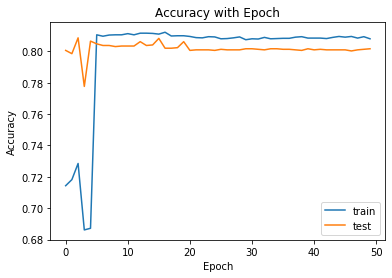

In [37]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy with Epoch')
plt.legend()
plt.show()

In [39]:
# Use model to predict
print(model.predict(X_test[0:5]))
print(y_test[0:5])

[[0.8103782 ]
 [0.8370403 ]
 [0.7860385 ]
 [0.81248116]
 [0.7860385 ]]
3343    1
9       1
1741    1
5160    1
7760    0
Name: credit.policy, dtype: int64


In [40]:
# EXTRA: Try to optimize hyper-parameter through tuning
# Introduce batch normalization to try to make model more stable and efficient since some features have a lot of variance

In [20]:
# Batch size and epochs
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model(): # Function to create model (required for KerasClassifier)
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (10,)), # flatten input first of size 10 (10 features)
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = tf.nn.relu),
        keras.layers.Dense(16, activation = tf.nn.relu),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(1, activation = tf.nn.sigmoid), # sigmoid squash between 0 and 1 (binary classification)
    ])  
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy', # for binary classification, give a probability
                  metrics = ['accuracy'])     
    return model

np.random.seed(1)
tf.random.set_seed(1)

model = KerasClassifier(build_fn=create_model, verbose=0)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.981729 using {'batch_size': 20, 'epochs': 50}
0.975047 (0.020588) with: {'batch_size': 10, 'epochs': 10}
0.970871 (0.029483) with: {'batch_size': 10, 'epochs': 50}
0.978492 (0.015512) with: {'batch_size': 10, 'epochs': 100}
0.974734 (0.020096) with: {'batch_size': 20, 'epochs': 10}
0.981729 (0.015937) with: {'batch_size': 20, 'epochs': 50}
0.980372 (0.019941) with: {'batch_size': 20, 'epochs': 100}
0.969409 (0.023358) with: {'batch_size': 40, 'epochs': 10}
0.972124 (0.021918) with: {'batch_size': 40, 'epochs': 50}
0.979432 (0.015373) with: {'batch_size': 40, 'epochs': 100}
0.969722 (0.023010) with: {'batch_size': 60, 'epochs': 10}
0.973585 (0.020993) with: {'batch_size': 60, 'epochs': 50}
0.974838 (0.018947) with: {'batch_size': 60, 'epochs': 100}
0.960221 (0.034258) with: {'batch_size': 80, 'epochs': 10}
0.969305 (0.025723) with: {'batch_size': 80, 'epochs': 50}
0.969931 (0.025632) with: {'batch_size': 80, 'epochs': 100}
0.963040 (0.029555) with: {'batch_size': 100, 'epochs': 

In [ ]:
# batch_size = 20, epoch = 50 -> best result: 98.17% accuracy

In [21]:
# Dropout Rate (dropout_rate = 1 - keep_prob)
def create_model(dropout_rate=0.0):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (10,)), # flatten input first of size 10 (10 features)
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = tf.nn.relu),
        keras.layers.Dense(16, activation = tf.nn.relu),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(1, activation = tf.nn.sigmoid), # sigmoid squash between 0 and 1 (binary classification)
    ])
    
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy', # for binary classification, give a probability
                  metrics = ['accuracy'])
    
    return model


np.random.seed(1)
tf.random.set_seed(1)

model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=20, verbose=0)

dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.992900 using {'dropout_rate': 0.9}
0.968991 (0.026686) with: {'dropout_rate': 0.0}
0.979119 (0.019530) with: {'dropout_rate': 0.1}
0.978284 (0.017520) with: {'dropout_rate': 0.2}
0.982564 (0.014192) with: {'dropout_rate': 0.3}
0.975673 (0.020210) with: {'dropout_rate': 0.4}
0.976300 (0.020696) with: {'dropout_rate': 0.5}
0.984026 (0.013041) with: {'dropout_rate': 0.6}
0.986114 (0.011379) with: {'dropout_rate': 0.7}
0.985801 (0.012792) with: {'dropout_rate': 0.8}
0.992900 (0.006021) with: {'dropout_rate': 0.9}


In [ ]:
# Best: 0.9 -> 99.29%

In [22]:
# Number of Neurons
def create_model(neurons=1):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (10,)), # flatten input first of size 10 (10 features)
        keras.layers.BatchNormalization(),
        keras.layers.Dense(neurons, activation = tf.nn.relu),
        keras.layers.Dense(neurons, activation = tf.nn.relu),
        keras.layers.Dropout(0.9),
        keras.layers.Dense(1, activation = tf.nn.sigmoid), # sigmoid squash between 0 and 1 (binary classification)
    ])
    
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy', # for binary classification, give a probability
                  metrics = ['accuracy'])
    
    return model


np.random.seed(1)
tf.random.set_seed(1)

model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=20, verbose=0)

neurons = [1, 5, 10, 16, 25, 32, 40]
param_grid = dict(neurons=neurons)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'neurons': 1}
1.000000 (0.000000) with: {'neurons': 1}
0.999896 (0.000148) with: {'neurons': 5}
0.997599 (0.001703) with: {'neurons': 10}
0.994153 (0.004327) with: {'neurons': 16}
0.989559 (0.008319) with: {'neurons': 25}
0.982251 (0.015122) with: {'neurons': 32}
0.986427 (0.012128) with: {'neurons': 40}


In [ ]:
# neurons=1 as best, but also 5 same. 
# neurons=16 achieves close (99.24%), so I can also leave it like that
# Ill go with neurons=5 for now, since 1 neuron might lack learning ability

In [23]:
# Weight Initializer
def create_model(init_mode='uniform'):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (10,)), # flatten input first of size 10 (10 features)
        keras.layers.BatchNormalization(),
        keras.layers.Dense(5, kernel_initializer=init_mode, activation = tf.nn.relu),
        keras.layers.Dense(5, kernel_initializer=init_mode, activation = tf.nn.relu),
        keras.layers.Dropout(0.9),
        keras.layers.Dense(1, kernel_initializer=init_mode, activation = tf.nn.sigmoid), # sigmoid squash between 0 and 1 (binary classification)
    ])
    
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy', # for binary classification, give a probability
                  metrics = ['accuracy'])
    
    return model


np.random.seed(1)
tf.random.set_seed(1)

model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=20, verbose=0)

init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'init_mode': 'uniform'}
1.000000 (0.000000) with: {'init_mode': 'uniform'}
1.000000 (0.000000) with: {'init_mode': 'lecun_uniform'}
0.998956 (0.001476) with: {'init_mode': 'normal'}
1.000000 (0.000000) with: {'init_mode': 'zero'}
0.999374 (0.000886) with: {'init_mode': 'glorot_normal'}
1.000000 (0.000000) with: {'init_mode': 'glorot_uniform'}
1.000000 (0.000000) with: {'init_mode': 'he_normal'}
1.000000 (0.000000) with: {'init_mode': 'he_uniform'}


In [24]:
# Learning Rate
def create_model(lr=0.1):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (10,)), # flatten input first of size 10 (10 features)
        keras.layers.BatchNormalization(),
        keras.layers.Dense(5, kernel_initializer='uniform', activation = tf.nn.relu),
        keras.layers.Dense(5, kernel_initializer='uniform', activation = tf.nn.relu),
        keras.layers.Dropout(0.9),
        keras.layers.Dense(1, kernel_initializer='uniform', activation = tf.nn.sigmoid), # sigmoid squash between 0 and 1 (binary classification)
    ])
    
    model.compile(optimizer = keras.optimizers.Adam(learning_rate=lr),
                  loss = 'binary_crossentropy', # for binary classification, give a probability
                  metrics = ['accuracy'])
    
    return model


np.random.seed(1)
tf.random.set_seed(1)

model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=20, verbose=0)

lr = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
param_grid = dict(lr=lr)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

D:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: 

In [ ]:
# again, uniform and he_uniform gave the highest score, but to use a kernel_initializer that is familiar in class: he_uniform

In [75]:
# Recap of Hyper-parameter tuning results (give best score)

# Epochs             = 50
# Batch size         = 20
# Dropout Rate       = 0.9
# Number of Neurons  = 5
# Kernel Initializer = uniform

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (10,)), # flatten input first of size 10 (10 features)
    keras.layers.BatchNormalization(),
    keras.layers.Dense(5, kernel_initializer='uniform', activation = tf.nn.relu),
    keras.layers.Dense(5, kernel_initializer='uniform', activation = tf.nn.relu),
    keras.layers.Dropout(0.9),
    keras.layers.Dense(1, kernel_initializer='uniform', activation = tf.nn.sigmoid),
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy', # for binary classification, give a probability
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 50, batch_size = 20) # trained for 100 epochs with batch_size=20

train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Train Accuracy: ', train_acc)
print('Test Accuracy: ', test_acc)

Train on 6704 samples, validate on 2874 samples
Epoch 1/50
6704/6704 [==============================] - 1s 184us/sample - loss: 0.6499 - accuracy: 0.8049 - val_loss: 0.6142 - val_accuracy: 0.7996
Epoch 2/50
6704/6704 [==============================] - 0s 69us/sample - loss: 0.5842 - accuracy: 0.8073 - val_loss: 0.5645 - val_accuracy: 0.7996
Epoch 3/50
6704/6704 [==============================] - 0s 68us/sample - loss: 0.5432 - accuracy: 0.8073 - val_loss: 0.5345 - val_accuracy: 0.7996
Epoch 4/50
6704/6704 [==============================] - 0s 69us/sample - loss: 0.5186 - accuracy: 0.8073 - val_loss: 0.5176 - val_accuracy: 0.7996
Epoch 5/50
6704/6704 [==============================] - 0s 68us/sample - loss: 0.5046 - accuracy: 0.8073 - val_loss: 0.5084 - val_accuracy: 0.7996
Epoch 6/50
6704/6704 [==============================] - 0s 70us/sample - loss: 0.4972 - accuracy: 0.8073 - val_loss: 0.5040 - val_accuracy: 0.7996
Epoch 7/50
6704/6704 [==============================] - 0s 68us/sampl

In [77]:
# Achieved Train Accuracy = 80.73%
# Achieved Test Accuracy = 79.96%

In [ ]:
# Recap of Hyper-parameter tuning results (give best score) [updated]

# Epochs             = 100
# Batch size         = 20
# Dropout Rate       = 0.6 (best results)
# Number of Neurons  = 16
# Kernel Initializer = he_uniform (similar to class)

In [75]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (10,)), # flatten input first of size 10 (10 features)
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, kernel_initializer='he_uniform', activation = tf.nn.relu),
    keras.layers.Dense(16, kernel_initializer='he_uniform', activation = tf.nn.relu),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(1, activation = tf.nn.sigmoid),
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy', # for binary classification, give a probability
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 20) # trained for 100 epochs with batch_size=20

train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Train Accuracy: ', train_acc)
print('Test Accuracy: ', test_acc)

Train on 6704 samples, validate on 2874 samples
Epoch 1/100
6704/6704 [==============================] - 1s 197us/sample - loss: 0.7917 - accuracy: 0.6874 - val_loss: 0.4332 - val_accuracy: 0.8330
Epoch 2/100
6704/6704 [==============================] - 0s 68us/sample - loss: 0.4576 - accuracy: 0.8125 - val_loss: 0.3727 - val_accuracy: 0.8483
Epoch 3/100
6704/6704 [==============================] - 0s 67us/sample - loss: 0.4118 - accuracy: 0.8404 - val_loss: 0.3435 - val_accuracy: 0.8646
Epoch 4/100
6704/6704 [==============================] - 0s 67us/sample - loss: 0.3995 - accuracy: 0.8396 - val_loss: 0.3303 - val_accuracy: 0.8692
Epoch 5/100
6704/6704 [==============================] - 0s 67us/sample - loss: 0.3842 - accuracy: 0.8529 - val_loss: 0.3225 - val_accuracy: 0.8695
Epoch 6/100
6704/6704 [==============================] - 0s 67us/sample - loss: 0.3712 - accuracy: 0.8525 - val_loss: 0.3124 - val_accuracy: 0.8747
Epoch 7/100
6704/6704 [==============================] - 0s 68u

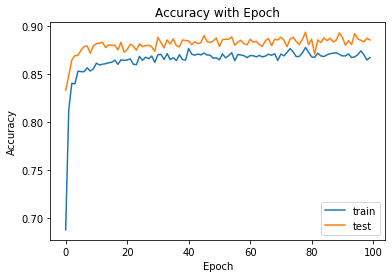

In [76]:
# Achieved Train Accuracy = 89.39%
# Achieved Test Accuracy = 87.82%
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy with Epoch')
plt.legend()
plt.show()

In [77]:
# Use model to predict
print(model.predict(X_test[0:5]))
print(y_test[0:5])

[[0.93400955]
 [0.9223301 ]
 [0.8085219 ]
 [0.9508599 ]
 [0.01656977]]
3343    1
9       1
1741    1
5160    1
7760    0
Name: credit.policy, dtype: int64


In [ ]:
# as can be seen from above, the difference in predicted to actual is smaller when drop_out=0.6 rather than when drop_out=0.9,
# even though that was the optimized value.
# in addition, drop_out=0.7 and drop_out=0.8 produce similar accuracies, even though during tuning they were 0.1 off
# this signifies that once the tuning scores are relatively similar, any of those values can be chosen
# in this case, drop_out=0.6 score was 0.9771, yet when applied to the model with training, it proved to consistently be the most accurate
# also, since they results changed ever so slightly, to confirm that drop_out=0.6 is most accurate, training conducted twice to assess accuracy

In [ ]:
# Note: since DNN is required, minimum 2 hidden layers are used. Otherwise, for Shallow NN, only 1 hidden layer would have used